In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('fdia_data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

fdia_data/data3.csv
fdia_data/data7.csv
fdia_data/data13.csv
fdia_data/data12.csv
fdia_data/data5.csv
fdia_data/data2.csv
fdia_data/data4.csv
fdia_data/data6.csv
fdia_data/data11.csv
fdia_data/data10.csv
fdia_data/data8.csv
fdia_data/data15.csv
fdia_data/data14.csv
fdia_data/data1.csv
fdia_data/data9.csv


In [2]:
import pandas as pd  
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

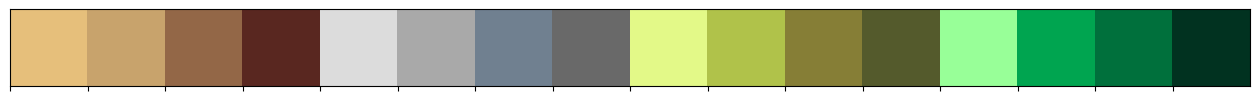

In [4]:
colors = [
    "#e6bf7b", "#c8a36c", "#936747", "#592720", "#dcdcdc", "#a9a9a9",
    "#708090", "#696969", "#e3f988", "#b0c24a", "#867e36", "#545a2c",
    "#98ff98", "#00a550", "#00703c", "#013220"
]
sns.palplot(sns.color_palette(colors))

In [5]:

# Create a new DataFrame to store the ranges in a tabular format
ranges_df = pd.DataFrame(columns=['Column Name', 'Min', 'Max'])

# Calculate the range for each column (assuming numeric data)
for column in df.columns:
    min_val = df[column].min()
    max_val = df[column].max()
    # Append the results to the ranges_df DataFrame
    ranges_df.loc[len(ranges_df.index)] = [column, min_val, max_val]

# Print the ranges as a table
print(ranges_df.to_string(index=False))

NameError: name 'df' is not defined

In [ ]:
# Initialize a scaler for normalization
scaler = MinMaxScaler(feature_range=(-1, 1))

# Analyze each column in the DataFrame
analysis_df = pd.DataFrame(columns=['Feature', 'Type', 'Count', 'Max Range Pre-Scale', 'Max Range Post-Scale', 'Example'])

for column in df.columns:
    # Detect data type and define feature type
    if pd.api.types.is_numeric_dtype(df[column]):
        feature_type = 'Continuous'
    elif pd.api.types.is_categorical_dtype(df[column]) or pd.api.types.is_object_dtype(df[column]):
        feature_type = 'Categorical'
    elif 'Hash' in column:  # Example condition. Adjust the logic as needed.
        feature_type = 'Hash Categorical'
    else:
        feature_type = 'Unknown'

    # Calculate range pre-scale
    pre_scale_range = f"[{df[column].min()}, {df[column].max()}]"

    # Normalize if feature is continuous and calculate range post-scale
    if feature_type == 'Continuous':
        normalized = scaler.fit_transform(df[[column]])
        post_scale_range = f"[{normalized.min()}, {normalized.max()}]"
    else:
        normalized = df[column]  # Placeholder, as categorical features are not normalized this way
        post_scale_range = 'N/A'  # Not applicable for non-continuous features

    # Add analysis to the DataFrame
    analysis_df.loc[len(analysis_df.index)] = [column, feature_type, df[column].nunique(), 
                                               pre_scale_range, post_scale_range, 
                                               df[column][0]]  # Take the first element as an example

# Print the analysis DataFrame as a table
print(analysis_df.to_markdown(index=False))

| Feature            | Type       |   Count | Max Range Pre-Scale         | Max Range Post-Scale                      |        Example |
|:-------------------|:-----------|--------:|:----------------------------|:------------------------------------------|---------------:|
| R1-PA1:VH          | Continuous |    4341 | [-179.9889618, 179.9946913] | [-1.0, 1.0]                               |     70.3993    |
| R1-PM1:V           | Continuous |     386 | [24998.05019, 144848.2808]  | [-1.0, 1.0000000000000002]                | 127673         |
| R1-PA2:VH          | Continuous |    4336 | [-179.9946913, 179.971773]  | [-1.0, 1.0000000000000002]                |    -49.5723    |
| R1-PM2:V           | Continuous |     378 | [102449.3812, 144146.2292]  | [-1.0, 1.0]                               | 127648         |
| R1-PA3:VH          | Continuous |    4351 | [-179.9603139, 179.9660435] | [-1.0, 0.9999999999999999]                |   -169.578     |
| R1-PM3:V           | Continuous |     3

In [ ]:
# Initialize a scaler for normalization
scaler = MinMaxScaler(feature_range=(-1, 1))

# Analyze each column in the DataFrame
analysis_df = pd.DataFrame(columns=['Feature', 'Max Range Pre-Scale', 'Max Range Post-Scale', 'Example'])

for column in df.columns:
    # Detect data type and define feature type
    if pd.api.types.is_numeric_dtype(df[column]):
        feature_type = 'Continuous'
    elif pd.api.types.is_categorical_dtype(df[column]) or pd.api.types.is_object_dtype(df[column]):
        feature_type = 'Categorical'
    elif 'Hash' in column:  # Example condition. Adjust the logic as needed.
        feature_type = 'Hash Categorical'
    else:
        feature_type = 'Unknown'

    # Calculate range pre-scale
    pre_scale_range = f"[{df[column].min()}, {df[column].max()}]"

    # Normalize if feature is continuous and calculate range post-scale
    if feature_type == 'Continuous':
        normalized = scaler.fit_transform(df[[column]])
        post_scale_range = f"[{normalized.min()}, {normalized.max()}]"
    else:
        normalized = df[column]  # Placeholder, as categorical features are not normalized this way
        post_scale_range = 'N/A'  # Not applicable for non-continuous features

    # Add analysis to the DataFrame
    analysis_df.loc[len(analysis_df.index)] = [column, 
                                               pre_scale_range, post_scale_range, 
                                               df[column][0]]  # Take the first element as an example

# Print the analysis DataFrame as a table
print(analysis_df.to_markdown(index=False))

| Feature            | Max Range Pre-Scale         | Max Range Post-Scale                      |        Example |
|:-------------------|:----------------------------|:------------------------------------------|---------------:|
| R1-PA1:VH          | [-179.9889618, 179.9946913] | [-1.0, 1.0]                               |     70.3993    |
| R1-PM1:V           | [24998.05019, 144848.2808]  | [-1.0, 1.0000000000000002]                | 127673         |
| R1-PA2:VH          | [-179.9946913, 179.971773]  | [-1.0, 1.0000000000000002]                |    -49.5723    |
| R1-PM2:V           | [102449.3812, 144146.2292]  | [-1.0, 1.0]                               | 127648         |
| R1-PA3:VH          | [-179.9603139, 179.9660435] | [-1.0, 0.9999999999999999]                |   -169.578     |
| R1-PM3:V           | [102499.5278, 144923.5006]  | [-1.0, 1.0]                               | 127723         |
| R1-PA4:IH          | [-179.9889618, 179.9202068] | [-1.0, 0.9999999999999999]         

In [6]:
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import torch

# Load and Clean Data
df = pd.read_csv('fdia_data/data1.csv')

# Change column "marker" to numerical value
df['marker'] = pd.Categorical(df['marker']).codes

# Data cleaning
df = df.dropna()
df = df.replace([float('inf'), float('-inf')], float('nan'))
df = df.dropna()


In [7]:
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import torch

# Load and Clean Data
df = pd.read_csv('fdia_data/data1.csv')

# Change column "marker" to numerical value
df['marker'] = pd.Categorical(df['marker']).codes

# Data cleaning
df = df.dropna()
df = df.replace([float('inf'), float('-inf')], float('nan'))
df = df.dropna()

# Split the data
X = df[df.columns.difference(['marker'])].values
Y = df['marker'].values

# Standardize the features
scaler = MinMaxScaler(feature_range=(-1, 1))
X = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
Y_train = torch.tensor(Y_train, dtype=torch.long)
Y_test = torch.tensor(Y_test, dtype=torch.long)

# Create datasets and dataloaders
train_dataset = TensorDataset(X_train, Y_train)
test_dataset = TensorDataset(X_test, Y_test)
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)

In [8]:
# save data for further verification
import numpy as np

X_test_np = X_test.numpy()
Y_test_np = Y_test.numpy()
np.savez(f'np_data/test_data_01.npz', X=X_test_np, y=Y_test_np)

In [10]:
# # Calculate min and max for each feature
# feature_ranges = []
# for feature, mean, scale in zip(range(X.shape[1]), scaler.mean_, scaler.scale_):
#     feature_min = (X[:, feature].min() - mean) / scale
#     feature_max = (X[:, feature].max() - mean) / scale
#     feature_ranges.append((feature_min, feature_max))

# # Convert the list of tuples into a numpy array
# feature_ranges_array = np.array(feature_ranges)

# # Save the array to a .npy file
# np.save('np_data/feature_ranges.npy', feature_ranges_array)

In [11]:
import torch
import torch.nn as nn
# Define FFNN Model
class FFNN(nn.Module):
    def __init__(self, input_size, output_size):
        super(FFNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 200)
        self.fc2 = nn.Linear(200, 100)
        self.fc3 = nn.Linear(100, output_size)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [14]:
import torch.onnx

# Function to save the model as ONNX format
def save_model_onnx(model, input_size, onnx_file_path):
    # Set the model to evaluation mode
    model.eval()
    
    # Create a dummy input tensor with the correct input size (batch_size, input_size)
    # The batch size can be arbitrary, here batch size is set to 1
    x = torch.randn(1, input_size, requires_grad=False)
    
    # Export the model
    torch_out = torch.onnx.export(model,         # Model being run
                                   x,             # Model input (or a tuple for multiple inputs)
                                   onnx_file_path, # Where to save the model
                                   export_params=True,  # Store the trained parameter weights inside the model file
                                   opset_version=9)    # The ONNX version to export the model to)
    print('Model has been saved in ONNX format at {}'.format(onnx_file_path))

# # Save the model
# input_size = X.shape[1]
# onnx_file_path = 'fdia_model_ffnn_pytorch.onnx'
# save_model_onnx(model, input_size, onnx_file_path)

In [15]:
import torch
import torch.nn as nn
import torch.optim as optim

# Initialize model, loss, and optimizer
model = FFNN(input_size=X.shape[1], output_size=2)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 100
for epoch in range(num_epochs):
    correct = 0
    total = 0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        loss = criterion(outputs, labels)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        loss.backward()
        optimizer.step()
  
    print('Epoch [{}/{}], \t Loss: {:.4f}, \t Train Acc: {:.4f}'.format(epoch+1, num_epochs, loss.item(), 100.0*correct/total))

# Test the model and calculate accuracy
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total
print('Test Accuracy of the model on the test dataset: {} %'.format(accuracy))

# Save the model checkpoint
torch.save(model.state_dict(), 'fdia_model_ffnn_pytorch.pth')

# Save the model
input_size = X.shape[1]
onnx_file_path = 'fdia_model_ffnn_pytorch.onnx'
save_model_onnx(model, input_size, onnx_file_path)

print("Model saved.")

Epoch [1/100], 	 Loss: 0.4855, 	 Train Acc: 78.2079
Epoch [2/100], 	 Loss: 0.4519, 	 Train Acc: 78.2620
Epoch [3/100], 	 Loss: 0.4170, 	 Train Acc: 78.2620
Epoch [4/100], 	 Loss: 0.3930, 	 Train Acc: 78.3703
Epoch [5/100], 	 Loss: 0.4100, 	 Train Acc: 78.2079
Epoch [6/100], 	 Loss: 0.4141, 	 Train Acc: 78.2620
Epoch [7/100], 	 Loss: 0.3328, 	 Train Acc: 77.5853
Epoch [8/100], 	 Loss: 0.3569, 	 Train Acc: 78.3433
Epoch [9/100], 	 Loss: 0.4013, 	 Train Acc: 78.3162
Epoch [10/100], 	 Loss: 0.3803, 	 Train Acc: 78.3703
Epoch [11/100], 	 Loss: 0.4412, 	 Train Acc: 78.4245
Epoch [12/100], 	 Loss: 0.4477, 	 Train Acc: 79.1554
Epoch [13/100], 	 Loss: 0.4295, 	 Train Acc: 79.1012
Epoch [14/100], 	 Loss: 0.4569, 	 Train Acc: 78.8847
Epoch [15/100], 	 Loss: 0.4080, 	 Train Acc: 79.2366
Epoch [16/100], 	 Loss: 0.4390, 	 Train Acc: 79.4802
Epoch [17/100], 	 Loss: 0.4424, 	 Train Acc: 80.3465
Epoch [18/100], 	 Loss: 0.4084, 	 Train Acc: 80.1570
Epoch [19/100], 	 Loss: 0.3688, 	 Train Acc: 81.1857
Ep

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

class TabularModel(nn.Module):
    def __init__(self, input_size, output_size, hidden_layers, p=0.5):
        super(TabularModel, self).__init__()
        # Create dynamic layers:
        all_layers = []
        for i in hidden_layers:
            all_layers.append(nn.Linear(input_size, i))
            all_layers.append(nn.ReLU(inplace=True))
            all_layers.append(nn.BatchNorm1d(i))
            all_layers.append(nn.Dropout(p))
            input_size = i  # Set input size for next layer
            
        all_layers.append(nn.Linear(hidden_layers[-1], output_size))
        self.layers = nn.Sequential(*all_layers)

    def forward(self, x):
        return self.layers(x)

# Example instantiation of the model:
model = TabularModel(input_size=128, output_size=2, hidden_layers=[50, 100, 50], p=0.1)

# Example criterion and optimizer for binary classification:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 100
for epoch in range(num_epochs):
    correct = 0
    total = 0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        loss = criterion(outputs, labels)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        loss.backward()
        optimizer.step()
  
    print('Epoch [{}/{}], \t Loss: {:.4f}, \t Train Acc: {:.4f}'.format(epoch+1, num_epochs, loss.item(), 100.0*correct/total))

# Test the model and calculate accuracy
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total
print('Test Accuracy of the model on the test dataset: {} %'.format(accuracy))

# Save the model checkpoint
torch.save(model.state_dict(), 'fdia_model_ffnn_02_pytorch.pth')
print("Model saved.")

Epoch [1/100], 	 Loss: 0.6402, 	 Train Acc: 63.1565
Epoch [2/100], 	 Loss: 0.5611, 	 Train Acc: 68.7331
Epoch [3/100], 	 Loss: 0.5353, 	 Train Acc: 71.9545
Epoch [4/100], 	 Loss: 0.5005, 	 Train Acc: 75.1760
Epoch [5/100], 	 Loss: 0.4131, 	 Train Acc: 78.6681
Epoch [6/100], 	 Loss: 0.3689, 	 Train Acc: 79.7239
Epoch [7/100], 	 Loss: 0.4031, 	 Train Acc: 80.9962
Epoch [8/100], 	 Loss: 0.3514, 	 Train Acc: 81.5376
Epoch [9/100], 	 Loss: 0.4151, 	 Train Acc: 82.9182
Epoch [10/100], 	 Loss: 0.2333, 	 Train Acc: 84.2718
Epoch [11/100], 	 Loss: 0.4152, 	 Train Acc: 84.7320
Epoch [12/100], 	 Loss: 0.2788, 	 Train Acc: 84.9756
Epoch [13/100], 	 Loss: 0.4060, 	 Train Acc: 84.4613
Epoch [14/100], 	 Loss: 0.3396, 	 Train Acc: 85.6795
Epoch [15/100], 	 Loss: 0.2276, 	 Train Acc: 86.2209
Epoch [16/100], 	 Loss: 0.2675, 	 Train Acc: 86.1397
Epoch [17/100], 	 Loss: 0.2626, 	 Train Acc: 86.7352
Epoch [18/100], 	 Loss: 0.2303, 	 Train Acc: 87.7910
Epoch [19/100], 	 Loss: 0.2719, 	 Train Acc: 88.6844
Ep